In [78]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

digit=load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [79]:
#digit.data.shape
digit.data[0].shape

(64,)

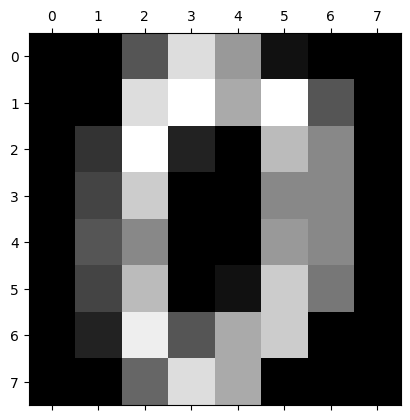

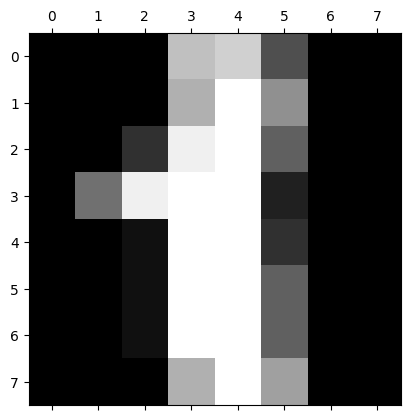

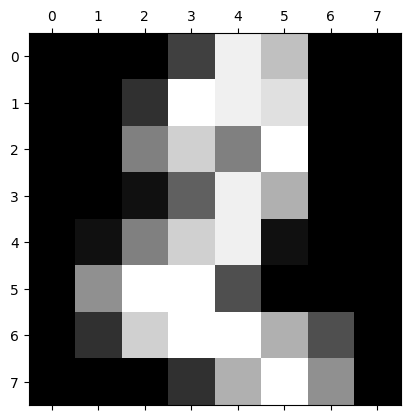

In [80]:
for i in range(3):
    plt.matshow(digit.images[i])

In [81]:
digit_df=pd.DataFrame(digit.data)
digit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [82]:
digit_df["target"]=digit.target
digit_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [83]:
model=RandomForestClassifier(n_estimators=30)
x=digit_df.drop('target',axis=1)
y=digit_df.target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [84]:
model.score(X_train,y_train)

1.0

In [85]:
print("Truth Result:",digit.target[75])
digit.data[75]

Truth Result: 2


array([ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       16.,  1.,  0.,  0.,  0.,  0.,  5.,  9., 15.,  0.,  0.,  0.,  0.,
        0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
        0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,
       16.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  9.,  0.])

In [86]:
model.predict([digit.data[75]])

array([2])

In [87]:
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 1,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  1,  0,  0,  1,  1,  0,  0,  0, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

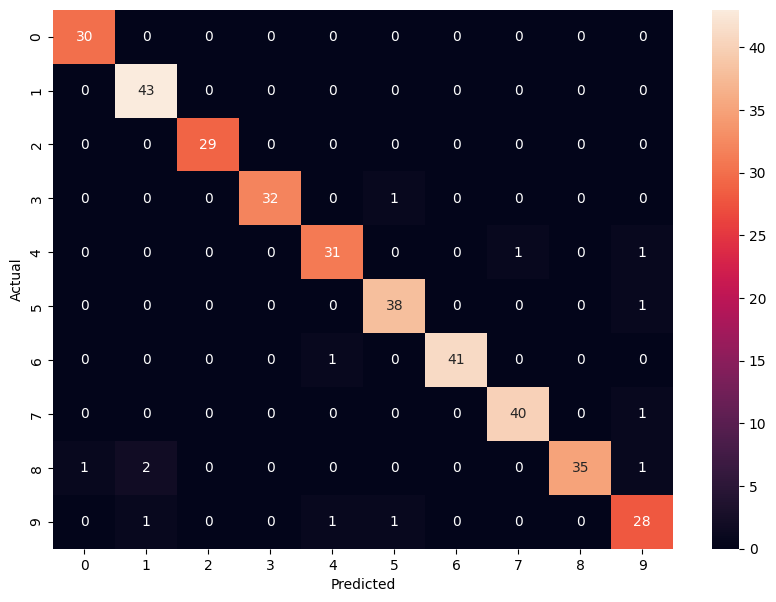

In [88]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")